### Telecom Customer Churn Analysis / Prediction

#### Define the Problem
An **revenue loss of 3.68M** (accounting for 17% of the total revenue) is expected due to **customer churn rate of 26.54%** (1869 out of 7043 customers). There appears to be significantly more churn among low spending customers.

In [1]:
DATA_PATH = r'E:\Epsilon_DS\finalProject\STREAMLIT\data\raw\telecom_customer_churn.csv'
EXPORT_PATH = r'E:\Epsilon_DS\finalProject\STREAMLIT\data\raw\explored_df.pkl'

In [2]:
# Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle


In [3]:
df = pd.read_csv(DATA_PATH)
df.head(10)

Customer ID  Gender  Age Married  Number of Dependents          City  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   
4  0013-EXCHZ  Female   75     Yes                     0     Camarillo   
5  0013-MHZWF  Female   23      No                     3      Midpines   
6  0013-SMEOE  Female   67     Yes                     0        Lompoc   
7  0014-BMAQU    Male   52     Yes                     0          Napa   
8  0015-UOCOJ  Female   68      No                     0   Simi Valley   
9  0016-QLJIS  Female   43     Yes                     1      Sheridan   

   Zip Code   Latitude   Longitude  Number of Referrals  ...   Payment Method  \
0     93225  34.827662 -118.999073                    2  ...      Credit Card   
1     91206  34.162515 -118.203869                    0  ...      Credit Card   
2     92627  33.645672 -117.922613                    0  ...  Bank Withdrawal   
3     94553  38.014457 -122.115432                    1  ...  Bank Withdrawal   
4     93010  34.227846 -119.079903                    3  ...      Credit Card   
5     95345  37.581496 -119.972762                    0  ...      Credit Card   
6     93437  34.757477 -120.550507                    1  ...  Bank Withdrawal   
7     94558  38.489789 -122.270110                    8  ...      Credit Card   
8     93063  34.296813 -118.685703                    0  ...  Bank Withdrawal   
9     95681  38.984756 -121.345074                    3  ...      Credit Card   

  Monthly Charge Total Charges  Total Refunds Total Extra Data Charges  \
0          65.60        593.30           0.00                        0   
1          -4.00        542.40          38.33                       10   
2          73.90        280.85           0.00                        0   
3          98.00       1237.85           0.00                        0   
4          83.90        267.40           0.00                        0   
5          69.40        571.45           0.00                        0   
6         109.70       7904.25           0.00                        0   
7          84.65       5377.80           0.00                       20   
8          48.20        340.35           0.00                        0   
9          90.45       5957.90           0.00                        0   

  Total Long Distance Charges Total Revenue  Customer Status   Churn Category  \
0                      381.51        974.81           Stayed              NaN   
1                       96.21        610.28           Stayed              NaN   
2                      134.60        415.45          Churned       Competitor   
3                      361.66       1599.51          Churned  Dissatisfaction   
4                       22.14        289.54          Churned  Dissatisfaction   
5                      150.93        722.38           Stayed              NaN   
6                      707.16       8611.41           Stayed              NaN   
7                      816.48       6214.28           Stayed              NaN   
8                       73.71        414.06           Stayed              NaN   
9                     1849.90       7807.80           Stayed              NaN   

                    Churn Reason  
0                            NaN  
1                            NaN  
2  Competitor had better devices  
3        Product dissatisfaction  
4            Network reliability  
5                            NaN  
6                            NaN  
7                            NaN  
8                            NaN  
9                            NaN  

[10 rows x 38 columns]

In [4]:
df.sample(1).iloc[0].T

Customer ID                           0048-LUMLS
Gender                                      Male
Age                                           23
Married                                      Yes
Number of Dependents                           3
City                                  Moss Beach
Zip Code                                   94038
Latitude                               37.515556
Longitude                            -122.502311
Number of Referrals                            1
Tenure in Months                              37
Offer                                    Offer C
Phone Service                                Yes
Avg Monthly Long Distance Charges          43.01
Multiple Lines                                No
Internet Service                             Yes
Internet Type                        Fiber Optic
Avg Monthly GB Download                     51.0
Online Security                               No
Online Backup                                 No
Device Protection Pl

In [5]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [6]:
df.nunique().sort_values(ascending=False)

Customer ID                          7043
Total Revenue                        6975
Total Charges                        6540
Total Long Distance Charges          6068
Avg Monthly Long Distance Charges    3583
Zip Code                             1626
Latitude                             1626
Longitude                            1625
Monthly Charge                       1591
City                                 1106
Total Refunds                         500
Tenure in Months                       72
Age                                    62
Avg Monthly GB Download                49
Churn Reason                           20
Total Extra Data Charges               16
Number of Referrals                    12
Number of Dependents                   10
Churn Category                          5
Offer                                   5
Contract                                3
Customer Status                         3
Payment Method                          3
Internet Type                     

In [7]:
df['Churn Category'].unique()

array([nan, 'Competitor', 'Dissatisfaction', 'Other', 'Price', 'Attitude'],
      dtype=object)

##### `churn category and churn reason are irrelevant (will cause data leakage) to our machine learning problem so I will drop them later`

In [8]:
df.select_dtypes(include='object').columns

Index(['Customer ID', 'Gender', 'Married', 'City', 'Offer', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [9]:
df.select_dtypes(exclude='object').columns

Index(['Age', 'Number of Dependents', 'Zip Code', 'Latitude', 'Longitude',
       'Number of Referrals', 'Tenure in Months',
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue'],
      dtype='object')

In [10]:
df.describe().T

count          mean          std  \
Age                                7043.0     46.509726    16.750352   
Number of Dependents               7043.0      0.468692     0.962802   
Zip Code                           7043.0  93486.070567  1856.767505   
Latitude                           7043.0     36.197455     2.468929   
Longitude                          7043.0   -119.756684     2.154425   
Number of Referrals                7043.0      1.951867     3.001199   
Tenure in Months                   7043.0     32.386767    24.542061   
Avg Monthly Long Distance Charges  6361.0     25.420517    14.200374   
Avg Monthly GB Download            5517.0     26.189958    19.586585   
Monthly Charge                     7043.0     63.596131    31.204743   
Total Charges                      7043.0   2280.381264  2266.220462   
Total Refunds                      7043.0      1.962182     7.902614   
Total Extra Data Charges           7043.0      6.860713    25.104978   
Total Long Distance Charges        7043.0    749.099262   846.660055   
Total Revenue                      7043.0   3034.379056  2865.204542   

                                            min           25%           50%  \
Age                                   19.000000     32.000000     46.000000   
Number of Dependents                   0.000000      0.000000      0.000000   
Zip Code                           90001.000000  92101.000000  93518.000000   
Latitude                              32.555828     33.990646     36.205465   
Longitude                           -124.301372   -121.788090   -119.595293   
Number of Referrals                    0.000000      0.000000      0.000000   
Tenure in Months                       1.000000      9.000000     29.000000   
Avg Monthly Long Distance Charges      1.010000     13.050000     25.690000   
Avg Monthly GB Download                2.000000     13.000000     21.000000   
Monthly Charge                       -10.000000     30.400000     70.050000   
Total Charges                         18.800000    400.150000   1394.550000   
Total Refunds                          0.000000      0.000000      0.000000   
Total Extra Data Charges               0.000000      0.000000      0.000000   
Total Long Distance Charges            0.000000     70.545000    401.440000   
Total Revenue                         21.360000    605.610000   2108.640000   

                                            75%           max  
Age                                   60.000000     80.000000  
Number of Dependents                   0.000000      9.000000  
Zip Code                           95329.000000  96150.000000  
Latitude                              38.161321     41.962127  
Longitude                           -117.969795   -114.192901  
Number of Referrals                    3.000000     11.000000  
Tenure in Months                      55.000000     72.000000  
Avg Monthly Long Distance Charges     37.680000     49.990000  
Avg Monthly GB Download               30.000000     85.000000  
Monthly Charge                        89.750000    118.750000  
Total Charges                       3786.600000   8684.800000  
Total Refunds                          0.000000     49.790000  
Total Extra Data Charges               0.000000    150.000000  
Total Long Distance Charges         1191.100000   3564.720000  
Total Revenue                       4801.145000  11979.340000

#### Columns have different ranges so we need to normalize them later

In [11]:
df.describe(include='object').T

count unique                            top  freq
Customer ID             7043   7043                     0002-ORFBO     1
Gender                  7043      2                           Male  3555
Married                 7043      2                             No  3641
City                    7043   1106                    Los Angeles   293
Offer                   3166      5                        Offer B   824
Phone Service           7043      2                            Yes  6361
Multiple Lines          6361      2                             No  3390
Internet Service        7043      2                            Yes  5517
Internet Type           5517      3                    Fiber Optic  3035
Online Security         5517      2                             No  3498
Online Backup           5517      2                             No  3088
Device Protection Plan  5517      2                             No  3095
Premium Tech Support    5517      2                             No  3473
Streaming TV            5517      2                             No  2810
Streaming Movies        5517      2                             No  2785
Streaming Music         5517      2                             No  3029
Unlimited Data          5517      2                            Yes  4745
Contract                7043      3                 Month-to-Month  3610
Paperless Billing       7043      2                            Yes  4171
Payment Method          7043      3                Bank Withdrawal  3909
Customer Status         7043      3                         Stayed  4720
Churn Category          1869      5                     Competitor   841
Churn Reason            1869     20  Competitor had better devices   313

In [12]:
# rename features for simplicity
df.rename(lambda x: x.lower().strip().replace(' ', '_'), axis='columns', inplace=True)
df.columns

Index(['customer_id', 'gender', 'age', 'married', 'number_of_dependents',
       'city', 'zip_code', 'latitude', 'longitude', 'number_of_referrals',
       'tenure_in_months', 'offer', 'phone_service',
       'avg_monthly_long_distance_charges', 'multiple_lines',
       'internet_service', 'internet_type', 'avg_monthly_gb_download',
       'online_security', 'online_backup', 'device_protection_plan',
       'premium_tech_support', 'streaming_tv', 'streaming_movies',
       'streaming_music', 'unlimited_data', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charge', 'total_charges', 'total_refunds',
       'total_extra_data_charges', 'total_long_distance_charges',
       'total_revenue', 'customer_status', 'churn_category', 'churn_reason'],
      dtype='object')

### Total expected loss in revenue due to customer churn

In [13]:
# total revenue of both stayed and churned customers
df['total_revenue'].sum()

21371131.69

In [14]:
df.groupby(['customer_status'])['total_revenue'].sum()

customer_status
Churned     3684459.82
Joined        54279.75
Stayed     17632392.12
Name: total_revenue, dtype: float64

In [15]:
# Percentage of revenue loss due to churned customers
print(f"Percentage of revenue loss due to churned customers:\
    {round(df.groupby(['customer_status'])['total_revenue'].sum()[0] / df['total_revenue'].sum() * 100, 2)}%")

Percentage of revenue loss due to churned customers:    17.24%


C:\Users\mahmo\AppData\Local\Temp\ipykernel_14408\3413254408.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  {round(df.groupby(['customer_status'])['total_revenue'].sum()[0] / df['total_revenue'].sum() * 100, 2)}%")


In [16]:
print(f"Expected revenue loss due to custmer's churn: {round(df.groupby(['customer_status'])['total_revenue'].sum()[0])}")

Expected revenue loss due to custmer's churn: 3684460


C:\Users\mahmo\AppData\Local\Temp\ipykernel_14408\424836742.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Expected revenue loss due to custmer's churn: {round(df.groupby(['customer_status'])['total_revenue'].sum()[0])}")


An **revenue loss of 3.68M** (accounting for 17% of the total revenue) is expected due to **customer churn rate of 26.54%** (1869 out of 7043 customers).

In [17]:
df['customer_status'].value_counts()

customer_status
Stayed     4720
Churned    1869
Joined      454
Name: count, dtype: int64

### Focus on stayed and churned customers 
- drop rows with "Joined" value in customer_status column

In [18]:
df_new = df.loc[df.customer_status != 'Joined']

e:\Epsilon_DS\finalProject\STREAMLIT\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Epsilon_DS\finalProject\STREAMLIT\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


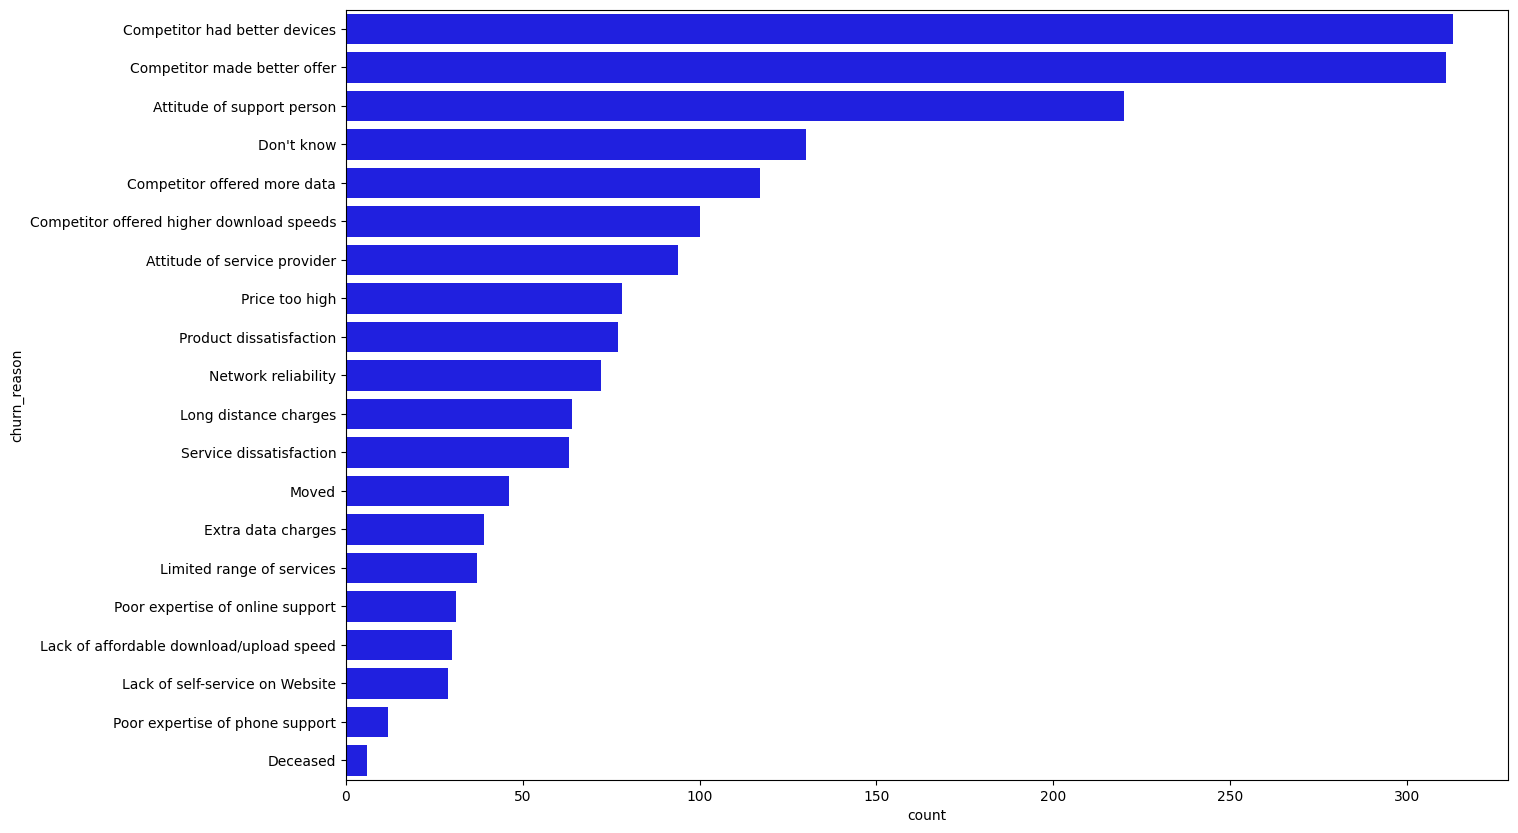

In [19]:
fig = plt.figure(figsize=(15, 10))
ax = sns.countplot(data=df_new, y=df_new['churn_reason'], order=df_new['churn_reason'].value_counts().index, color='blue')

In [20]:
cols_to_drop = ['customer_id', 'churn_category', 'churn_reason', 'city', 'zip_code',
                'latitude', 'longitude', 'monthly_charge', 'total_charges', 'total_refunds',
                'total_extra_data_charges', 'total_long_distance_charges']
df.drop(columns=cols_to_drop, inplace=True)
df.head(10)

gender  age married  number_of_dependents  number_of_referrals  \
0  Female   37     Yes                     0                    2   
1    Male   46      No                     0                    0   
2    Male   50      No                     0                    0   
3    Male   78     Yes                     0                    1   
4  Female   75     Yes                     0                    3   
5  Female   23      No                     3                    0   
6  Female   67     Yes                     0                    1   
7    Male   52     Yes                     0                    8   
8  Female   68      No                     0                    0   
9  Female   43     Yes                     1                    3   

   tenure_in_months    offer phone_service  avg_monthly_long_distance_charges  \
0                 9      NaN           Yes                              42.39   
1                 9      NaN           Yes                              10.69   
2                 4  Offer E           Yes                              33.65   
3                13  Offer D           Yes                              27.82   
4                 3      NaN           Yes                               7.38   
5                 9  Offer E           Yes                              16.77   
6                71  Offer A           Yes                               9.96   
7                63  Offer B           Yes                              12.96   
8                 7  Offer E           Yes                              10.53   
9                65      NaN           Yes                              28.46   

  multiple_lines  ... premium_tech_support streaming_tv  streaming_movies  \
0             No  ...                  Yes          Yes                No   
1            Yes  ...                   No           No               Yes   
2             No  ...                   No           No                No   
3             No  ...                   No          Yes               Yes   
4             No  ...                  Yes          Yes                No   
5             No  ...                  Yes          Yes               Yes   
6             No  ...                  Yes          Yes               Yes   
7            Yes  ...                  Yes           No                No   
8             No  ...                   No           No                No   
9            Yes  ...                  Yes          Yes               Yes   

  streaming_music unlimited_data        contract paperless_billing  \
0              No            Yes        One Year               Yes   
1             Yes             No  Month-to-Month                No   
2              No            Yes  Month-to-Month               Yes   
3              No            Yes  Month-to-Month               Yes   
4              No            Yes  Month-to-Month               Yes   
5             Yes            Yes  Month-to-Month               Yes   
6             Yes            Yes        Two Year               Yes   
7              No             No        Two Year               Yes   
8              No            Yes        Two Year               Yes   
9             Yes            Yes        Two Year               Yes   

    payment_method total_revenue customer_status  
0      Credit Card        974.81          Stayed  
1      Credit Card        610.28          Stayed  
2  Bank Withdrawal        415.45         Churned  
3  Bank Withdrawal       1599.51         Churned  
4      Credit Card        289.54         Churned  
5      Credit Card        722.38          Stayed  
6  Bank Withdrawal       8611.41          Stayed  
7      Credit Card       6214.28          Stayed  
8  Bank Withdrawal        414.06          Stayed  
9      Credit Card       7807.80          Stayed  

[10 rows x 26 columns]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             7043 non-null   object 
 1   age                                7043 non-null   int64  
 2   married                            7043 non-null   object 
 3   number_of_dependents               7043 non-null   int64  
 4   number_of_referrals                7043 non-null   int64  
 5   tenure_in_months                   7043 non-null   int64  
 6   offer                              3166 non-null   object 
 7   phone_service                      7043 non-null   object 
 8   avg_monthly_long_distance_charges  6361 non-null   float64
 9   multiple_lines                     6361 non-null   object 
 10  internet_service                   7043 non-null   object 
 11  internet_type                      5517 non-null   objec

In [22]:
df.duplicated().sum()

0

### EDA

In [23]:
df.isnull().sum().sort_values(ascending=False)

offer                                3877
online_security                      1526
streaming_music                      1526
device_protection_plan               1526
online_backup                        1526
streaming_movies                     1526
avg_monthly_gb_download              1526
internet_type                        1526
premium_tech_support                 1526
streaming_tv                         1526
unlimited_data                       1526
multiple_lines                        682
avg_monthly_long_distance_charges     682
contract                                0
paperless_billing                       0
payment_method                          0
total_revenue                           0
gender                                  0
age                                     0
internet_service                        0
phone_service                           0
tenure_in_months                        0
number_of_referrals                     0
number_of_dependents              

In [24]:
nulls = df.isnull().sum().sort_values(ascending=False)

In [25]:
cols_with_nulls = [col for col, v in zip(nulls.index, nulls.values) if v > 0]
cols_with_nulls

['offer',
 'online_security',
 'streaming_music',
 'device_protection_plan',
 'online_backup',
 'streaming_movies',
 'avg_monthly_gb_download',
 'internet_type',
 'premium_tech_support',
 'streaming_tv',
 'unlimited_data',
 'multiple_lines',
 'avg_monthly_long_distance_charges']

### Just making sure that the data are correctly represented
- transformation and dealing with missing values will be in the pipeline

In [26]:
# NaN in these features means "no internet service" which means "No" so I will  fill nan with "No" later
no_internet = ['online_security', 'premium_tech_support', 'unlimited_data', 'streaming_music',
 'streaming_movies', 'internet_type', 'streaming_tv', 'online_backup', 'device_protection_plan']

df[no_internet] = df[no_internet].fillna('No')
df['multiple_lines'] = df['multiple_lines'].fillna('No')

In [27]:
# show unique values in columns with nulls
for col in cols_with_nulls:
    print(f"unique values of {col} are: {df[col].unique()}")
    print('****' * 10)

unique values of offer are: [nan 'Offer E' 'Offer D' 'Offer A' 'Offer B' 'Offer C']
****************************************
unique values of online_security are: ['No' 'Yes']
****************************************
unique values of streaming_music are: ['No' 'Yes']
****************************************
unique values of device_protection_plan are: ['No' 'Yes']
****************************************
unique values of online_backup are: ['Yes' 'No']
****************************************
unique values of streaming_movies are: ['No' 'Yes']
****************************************
unique values of avg_monthly_gb_download are: [16. 10. 30.  4. 11. 73. 14.  7. 21. 59. 19. 12. 20. 22. 17.  9. nan 52.
 57. 51. 41. 23. 27.  2. 69. 53. 15. 29. 85. 28. 18. 48. 25. 26.  8.  6.
  5. 13. 75. 82. 24. 76. 47. 71. 58. 42.  3. 56. 46. 39.]
****************************************
unique values of internet_type are: ['Cable' 'Fiber Optic' 'DSL' 'No']
****************************************
unique

In [28]:
df.isnull().sum().sort_values(ascending=False) / len(df) * 100

offer                                55.047565
avg_monthly_gb_download              21.666903
avg_monthly_long_distance_charges     9.683374
gender                                0.000000
device_protection_plan                0.000000
total_revenue                         0.000000
payment_method                        0.000000
paperless_billing                     0.000000
contract                              0.000000
unlimited_data                        0.000000
streaming_music                       0.000000
streaming_movies                      0.000000
streaming_tv                          0.000000
premium_tech_support                  0.000000
online_security                       0.000000
online_backup                         0.000000
age                                   0.000000
internet_type                         0.000000
internet_service                      0.000000
multiple_lines                        0.000000
phone_service                         0.000000
tenure_in_mon

#### Numerical features distribution based on customer_status column

e:\Epsilon_DS\finalProject\STREAMLIT\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Epsilon_DS\finalProject\STREAMLIT\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Epsilon_DS\finalProject\STREAMLIT\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Epsilon_DS\finalProject\STREAMLIT\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

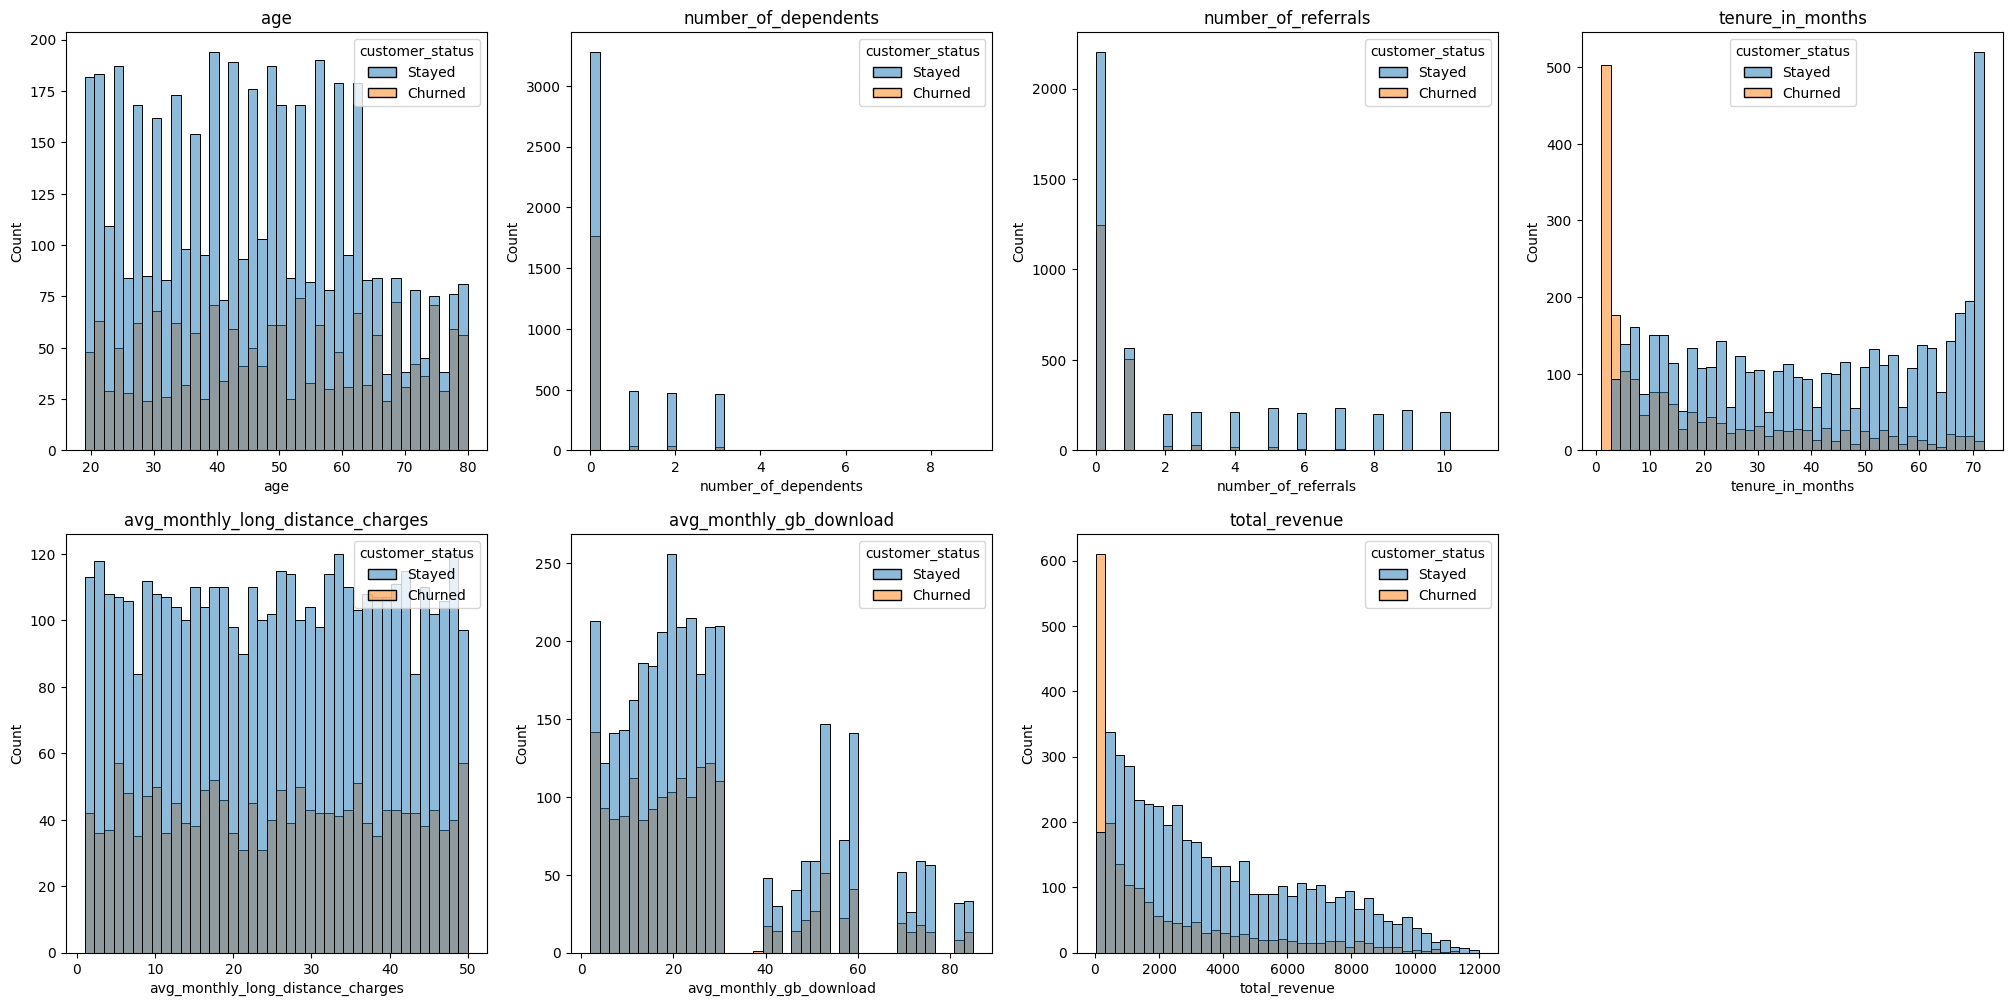

In [29]:
# drop rows of customer_status is 'Joined'
df = df.loc[df.customer_status != 'Joined']
df_num = df.select_dtypes(include='number')

fig = plt.figure(figsize=(25,25))

i = 1
for col in df_num.columns:
    plt.subplot(4,4,i)
    ax = sns.histplot(x=df_num[col], hue=df['customer_status'], bins=40)
    plt.title(str(col), loc='center')
    plt.xticks(fontsize=10)
    i += 1

### Insights from above figure
- age vs customer_status: churn is a little high in case of older customers while it decreases in case of younger customers.
- number_of_dependents: churn has high probability with customers that has no dependents and decreases with the existance of dependents
- number_of_referrals: customers who don't make any referrals are more likely to churn
- tenure_in_month: customers are more likely to churn in their early subscription i.e for the first 10 months cutomers are more likely to churn
- avg_monthly_long_distance_charges: there is no pattern in this field with churn
- avg_monthly_gb_download: customers with low values are more likely to churn
- total_revenue: the more revenue the customer give to the company the less likely they churn
-----------------------------------

#### Categorical features distribution based on customer_status column

e:\Epsilon_DS\finalProject\STREAMLIT\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Epsilon_DS\finalProject\STREAMLIT\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Epsilon_DS\finalProject\STREAMLIT\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Epsilon_DS\finalProject\STREAMLIT\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

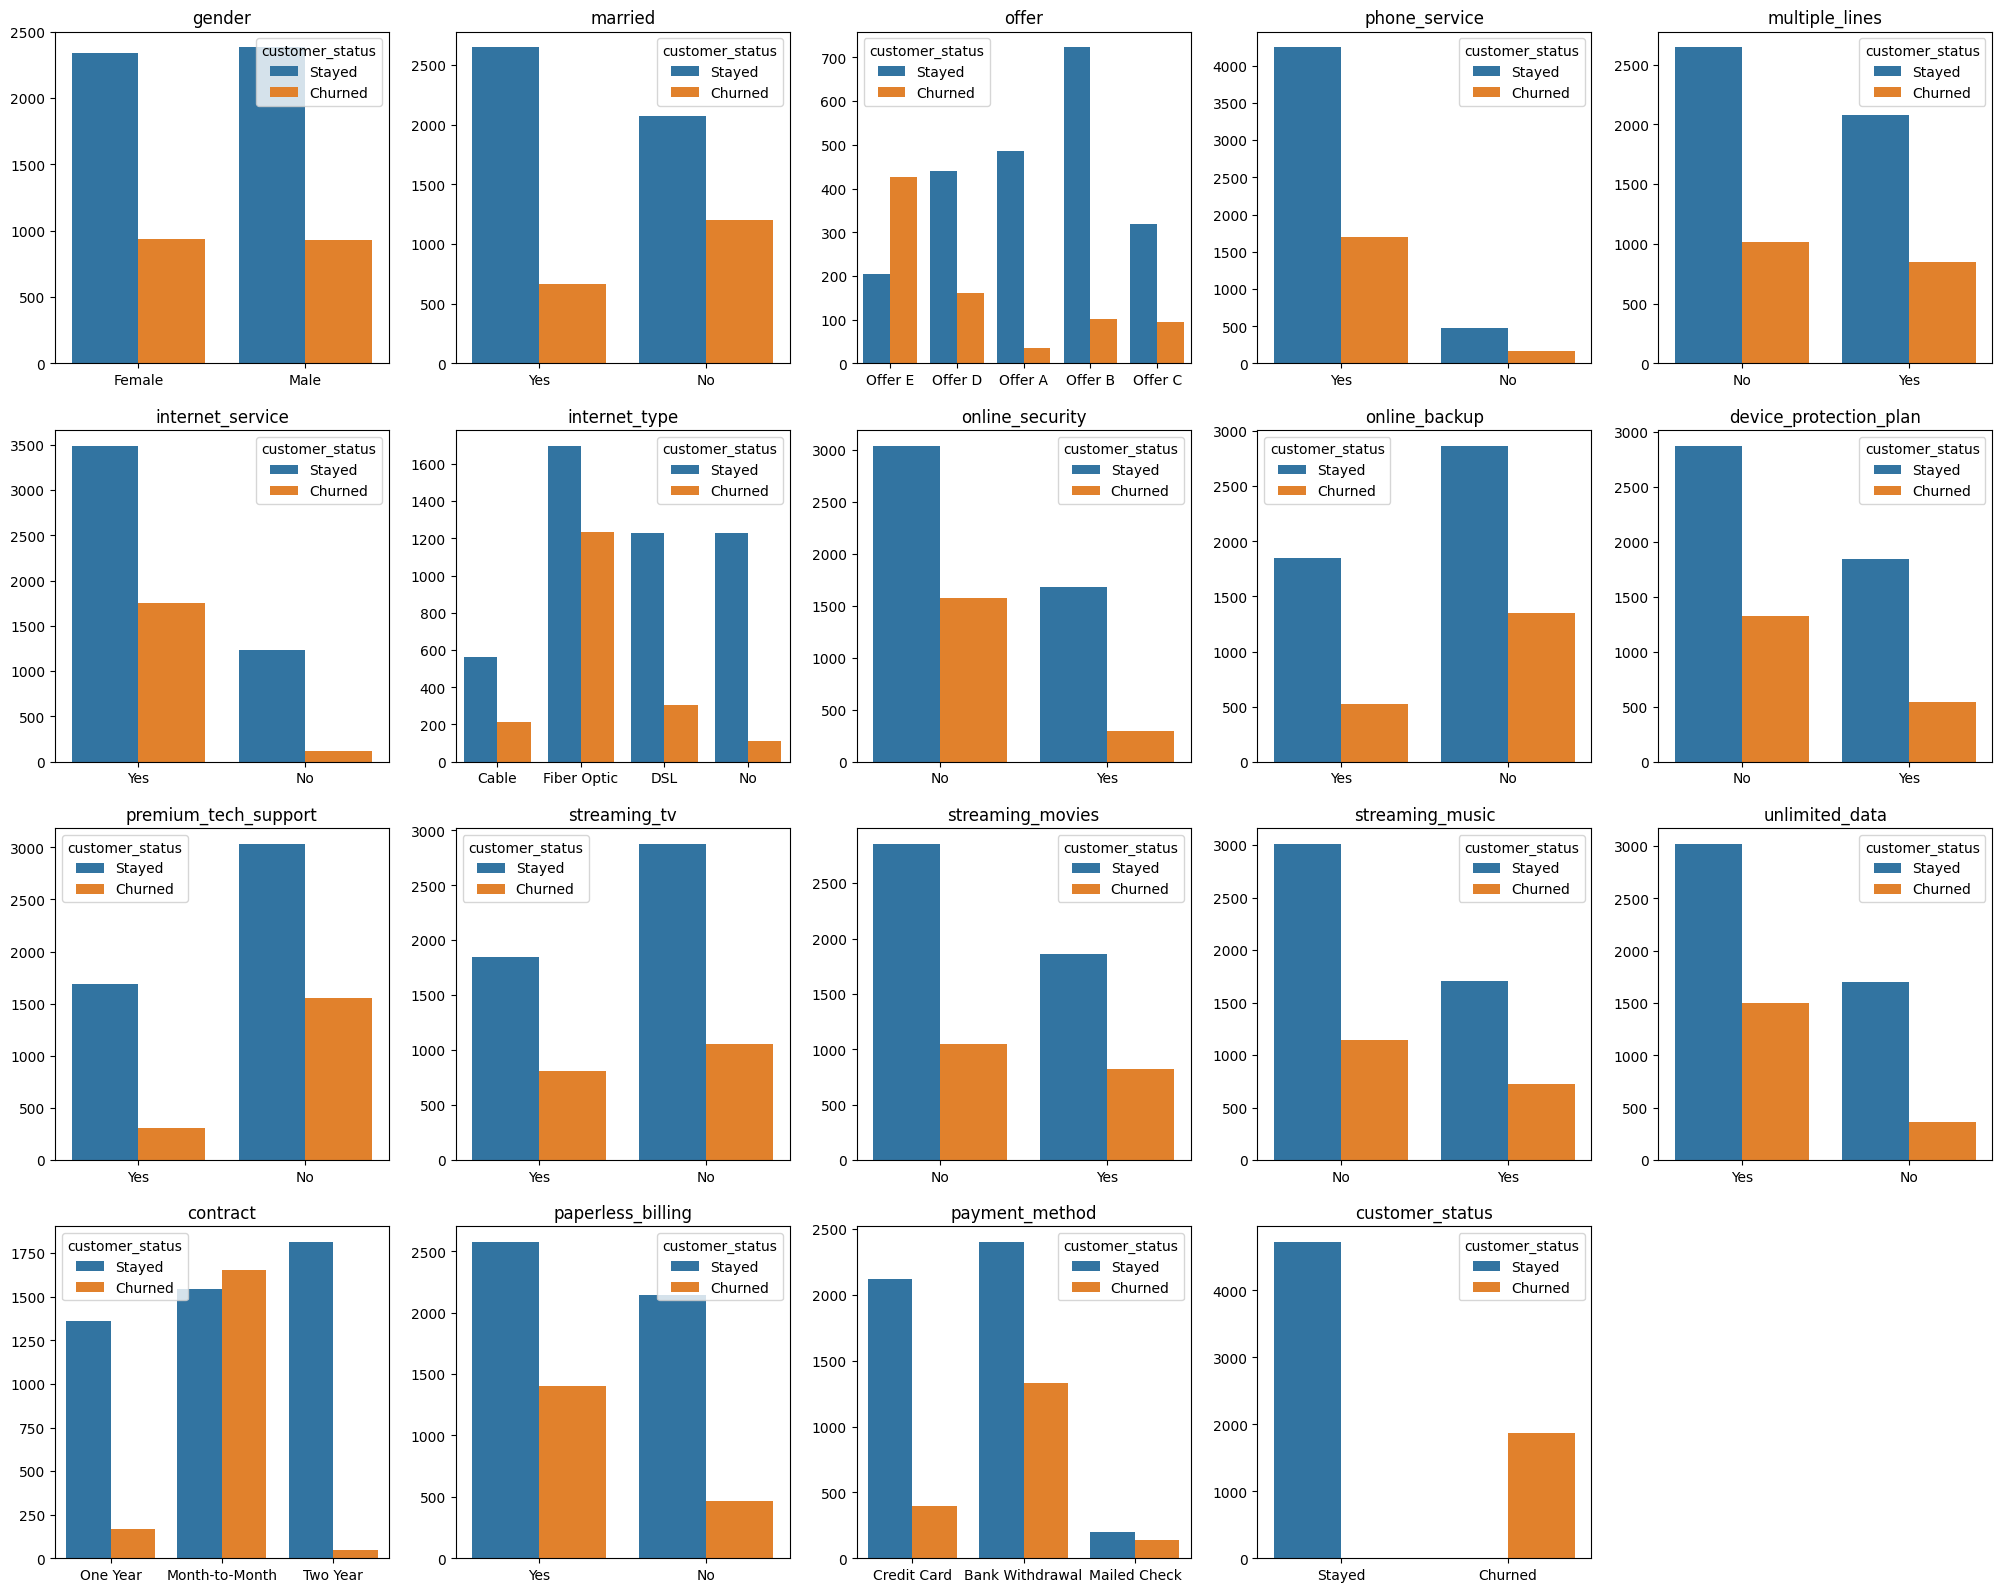

In [30]:
cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtype=='object']
df_cat = df[cat]

fig = plt.figure(figsize=(25,25))

i = 1
for col in df_cat.columns:
    plt.subplot(5,5,i)
    ax = sns.countplot(x=df_cat[col], hue=df_cat['customer_status'])
    ax.set(xlabel=None, ylabel=None)
    plt.title(str(col), loc='center')
    plt.xticks(fontsize=10)
    i += 1

### Insights from above figure
- gender: there is not much difference between genders on churn rate
- married: married customers are less likely to churn
- offer: Offer E seems to have bad effect on customer's satisfaction as it has high churn rate
- internet_service: customers who subscribe to internet service have more churn rate
- internet_type: fiber optic has the highest churn rate among different types
- other features related to internet_services: customers who are subscribed to internet services like streamingTV, movie, music tech support, etc. are less likely to churn
- unlimited_data: customers with unlimited data subscription have high churn rate
- contract: month_to_month contracts have very high churn rate while one and two years contracts have much less churn rate
- paperless_billing: churn rate is high for paperless billing
- payment_method: bank withdrawal has the highest churn rate among other methods
- customer_status: It is clear that we have an imbalanced class, I will handle this later 
-------------------------------------

In [31]:
df.head(10).T

0               1  \
gender                                  Female            Male   
age                                         37              46   
married                                    Yes              No   
number_of_dependents                         0               0   
number_of_referrals                          2               0   
tenure_in_months                             9               9   
offer                                      NaN             NaN   
phone_service                              Yes             Yes   
avg_monthly_long_distance_charges        42.39           10.69   
multiple_lines                              No             Yes   
internet_service                           Yes             Yes   
internet_type                            Cable           Cable   
avg_monthly_gb_download                   16.0            10.0   
online_security                             No              No   
online_backup                              Yes              No   
device_protection_plan                      No              No   
premium_tech_support                       Yes              No   
streaming_tv                               Yes              No   
streaming_movies                            No             Yes   
streaming_music                             No             Yes   
unlimited_data                             Yes              No   
contract                              One Year  Month-to-Month   
paperless_billing                          Yes              No   
payment_method                     Credit Card     Credit Card   
total_revenue                           974.81          610.28   
customer_status                         Stayed          Stayed   

                                                 2                3  \
gender                                        Male             Male   
age                                             50               78   
married                                         No              Yes   
number_of_dependents                             0                0   
number_of_referrals                              0                1   
tenure_in_months                                 4               13   
offer                                      Offer E          Offer D   
phone_service                                  Yes              Yes   
avg_monthly_long_distance_charges            33.65            27.82   
multiple_lines                                  No               No   
internet_service                               Yes              Yes   
internet_type                          Fiber Optic      Fiber Optic   
avg_monthly_gb_download                       30.0              4.0   
online_security                                 No               No   
online_backup                                   No              Yes   
device_protection_plan                         Yes              Yes   
premium_tech_support                            No               No   
streaming_tv                                    No              Yes   
streaming_movies                                No              Yes   
streaming_music                                 No               No   
unlimited_data                                 Yes              Yes   
contract                            Month-to-Month   Month-to-Month   
paperless_billing                              Yes              Yes   
payment_method                     Bank Withdrawal  Bank Withdrawal   
total_revenue                               415.45          1599.51   
customer_status                            Churned          Churned   

                                                4               5  \
gender                                     Female          Female   
age                                            75              23   
married                                       Yes              No   
number_of_dependents                            0               3   

In [32]:
for col in cat:
    print(f"{col}:")
    print(df[col].value_counts())
    print('--------------------------')

gender:
gender
Male      3312
Female    3277
Name: count, dtype: int64
--------------------------
married:
married
Yes    3318
No     3271
Name: count, dtype: int64
--------------------------
offer:
offer
Offer B    824
Offer E    630
Offer D    602
Offer A    520
Offer C    415
Name: count, dtype: int64
--------------------------
phone_service:
phone_service
Yes    5945
No      644
Name: count, dtype: int64
--------------------------
multiple_lines:
multiple_lines
No     3663
Yes    2926
Name: count, dtype: int64
--------------------------
internet_service:
internet_service
Yes    5245
No     1344
Name: count, dtype: int64
--------------------------
internet_type:
internet_type
Fiber Optic    2934
DSL            1537
No             1344
Cable           774
Name: count, dtype: int64
--------------------------
online_security:
online_security
No     4616
Yes    1973
Name: count, dtype: int64
--------------------------
online_backup:
online_backup
No     4214
Yes    2375
Name: count, dty

In [33]:
df[cat].nunique().sort_values(ascending=False)

offer                     5
internet_type             4
payment_method            3
contract                  3
gender                    2
streaming_tv              2
paperless_billing         2
unlimited_data            2
streaming_music           2
streaming_movies          2
device_protection_plan    2
premium_tech_support      2
married                   2
online_backup             2
online_security           2
internet_service          2
multiple_lines            2
phone_service             2
customer_status           2
dtype: int64

In [34]:
# ordinal_features = ['internet_type', 'contract']
# nominal_features = list(set(cat).difference(set(ordinal_features)))
# print(ordinal_features)
# print(nominal_features)

In [35]:
x=None
if x:
    print('1')
else:
    print('0')

0


### Check outliers

e:\Epsilon_DS\finalProject\STREAMLIT\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Epsilon_DS\finalProject\STREAMLIT\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Epsilon_DS\finalProject\STREAMLIT\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Epsilon_DS\finalProject\STREAMLIT\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

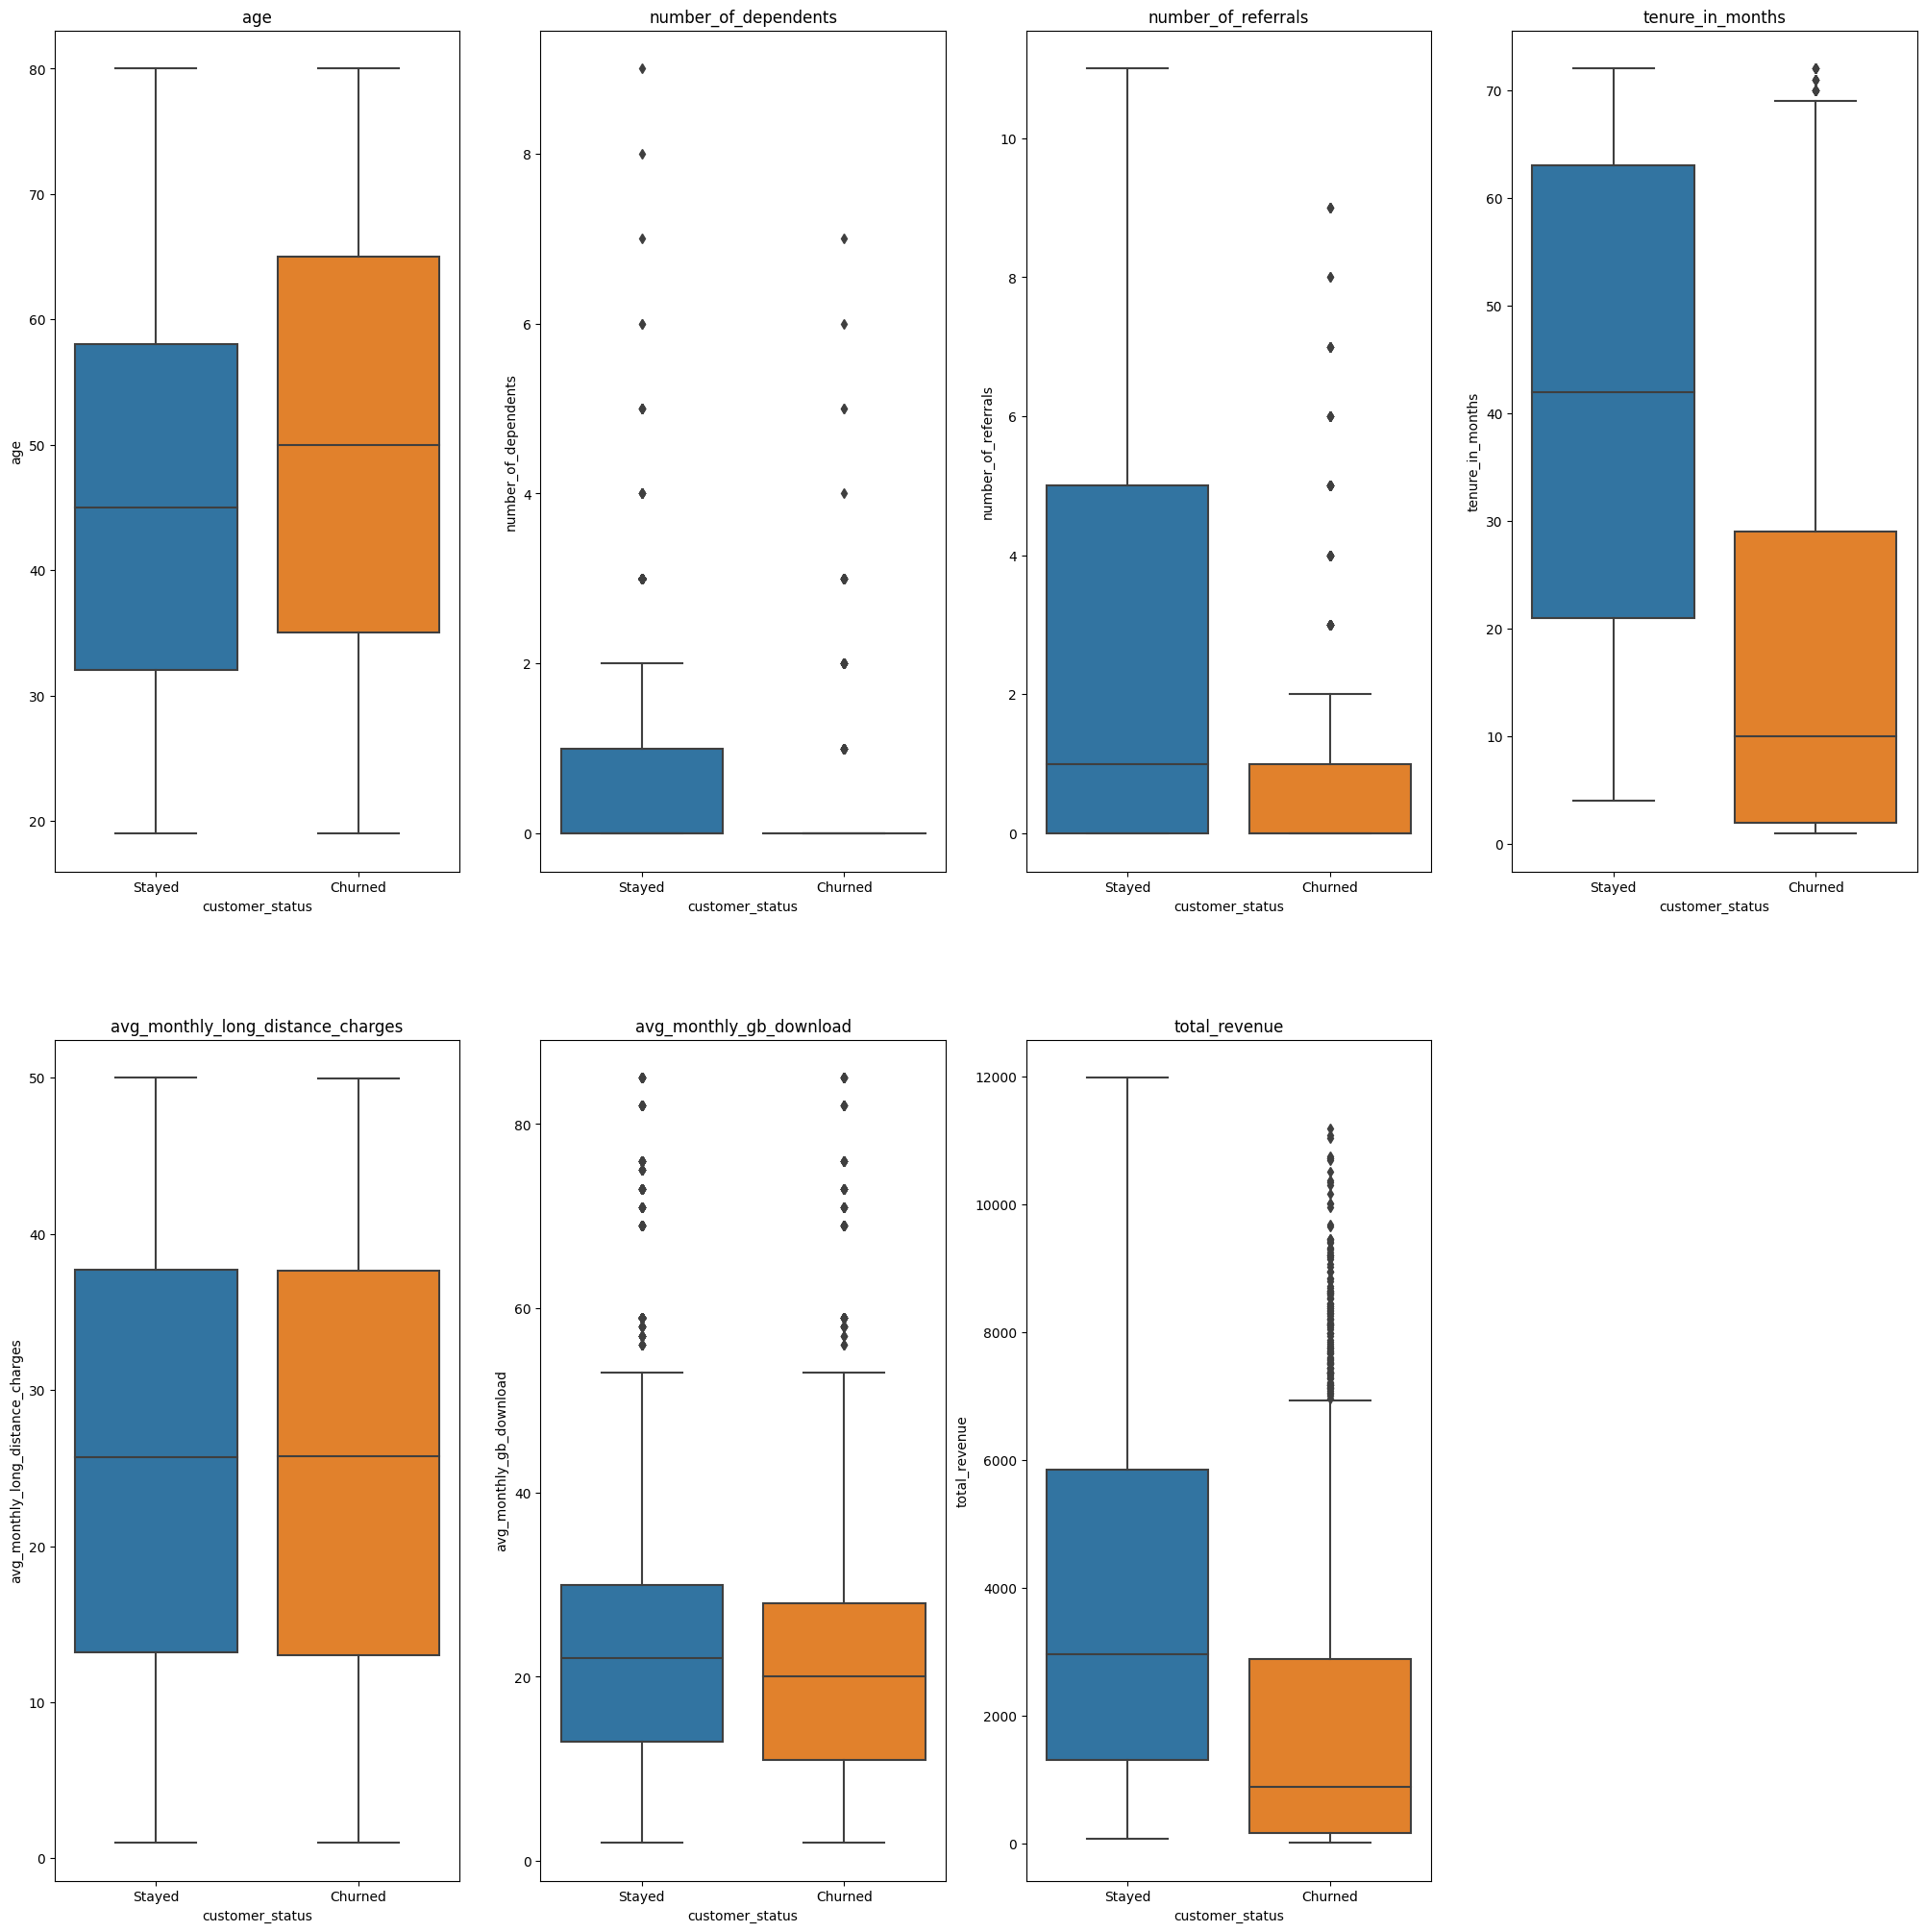

In [36]:
def box_plot(df, num_cols, x=None, shape=(1,1)):
    fig = plt.figure(figsize=(25,25))

    i = 1
    for col in num_cols:
        plt.subplot(shape[0],shape[1],i)
        ax = sns.boxplot(y=df[col], x=x)
        plt.title(str(col), loc='center')
        plt.xticks(fontsize=10)
        i += 1

num_cols = df.select_dtypes(include='number').columns
box_plot(df, num_cols, df['customer_status'], (2,4))

e:\Epsilon_DS\finalProject\STREAMLIT\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Epsilon_DS\finalProject\STREAMLIT\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Epsilon_DS\finalProject\STREAMLIT\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Epsilon_DS\finalProject\STREAMLIT\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

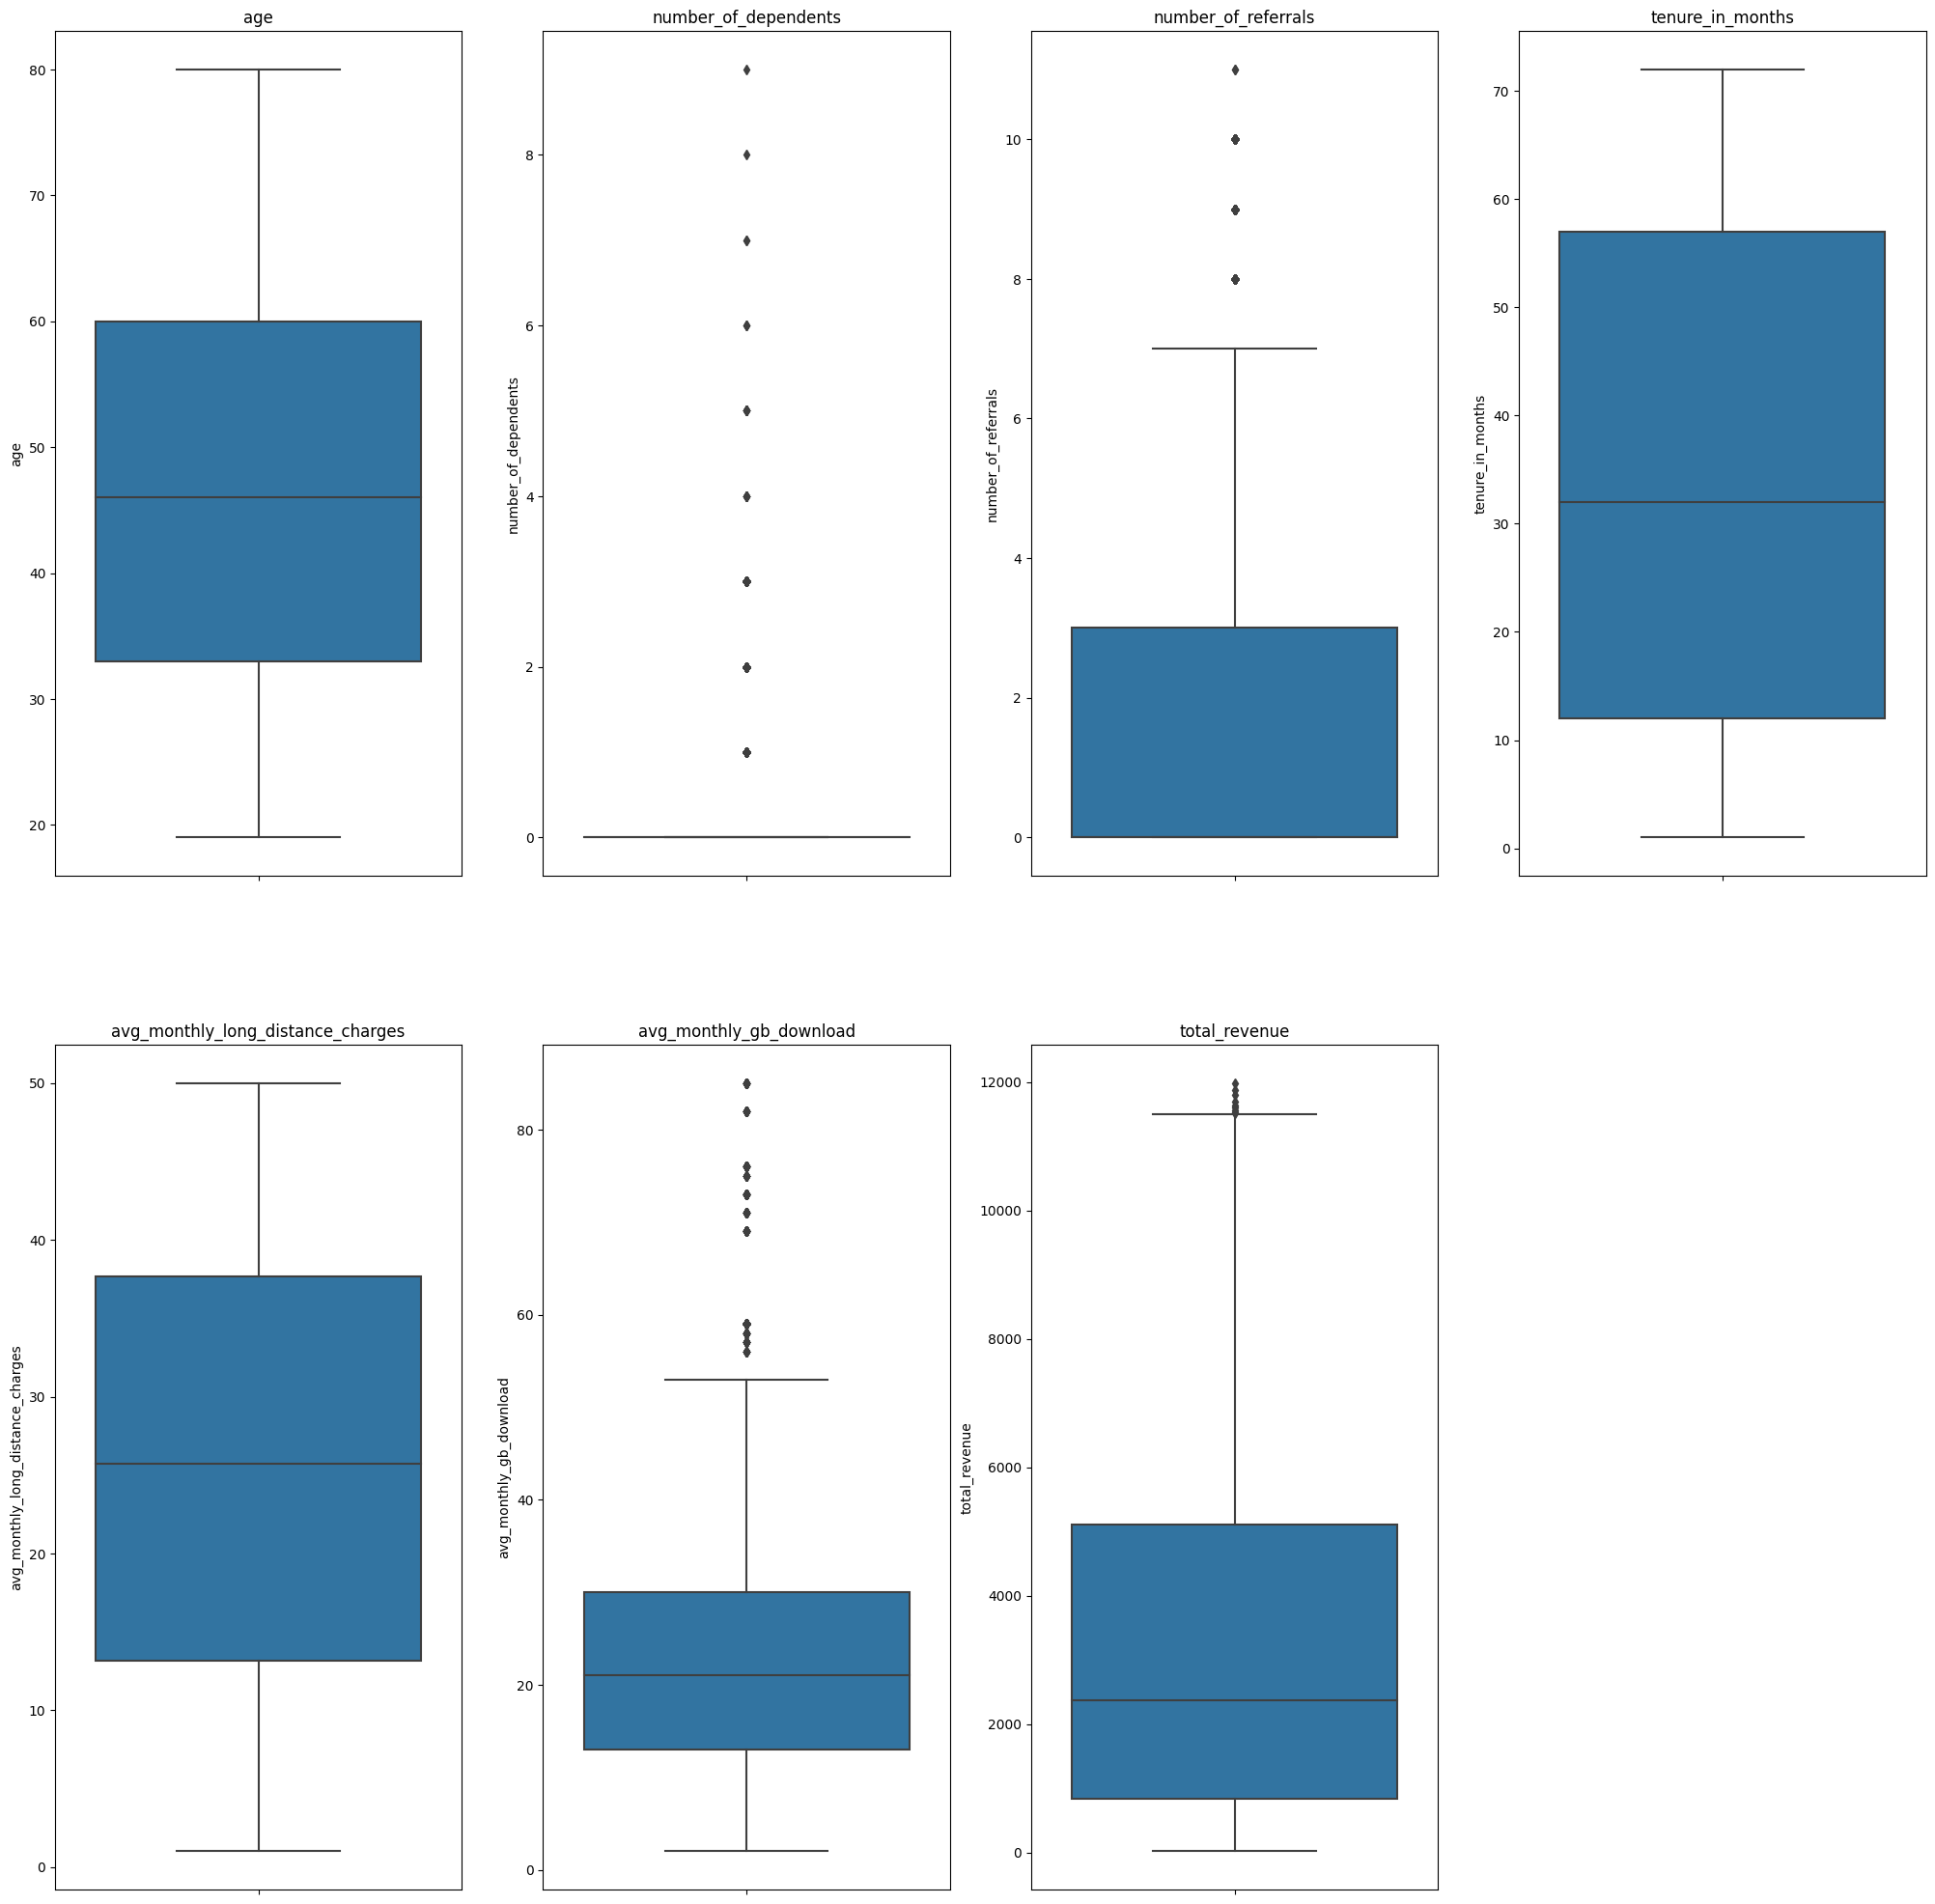

In [37]:
box_plot(df, num_cols, shape=(2,4))

### Bivariate analysis

e:\Epsilon_DS\finalProject\STREAMLIT\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Epsilon_DS\finalProject\STREAMLIT\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Epsilon_DS\finalProject\STREAMLIT\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Epsilon_DS\finalProject\STREAMLIT\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

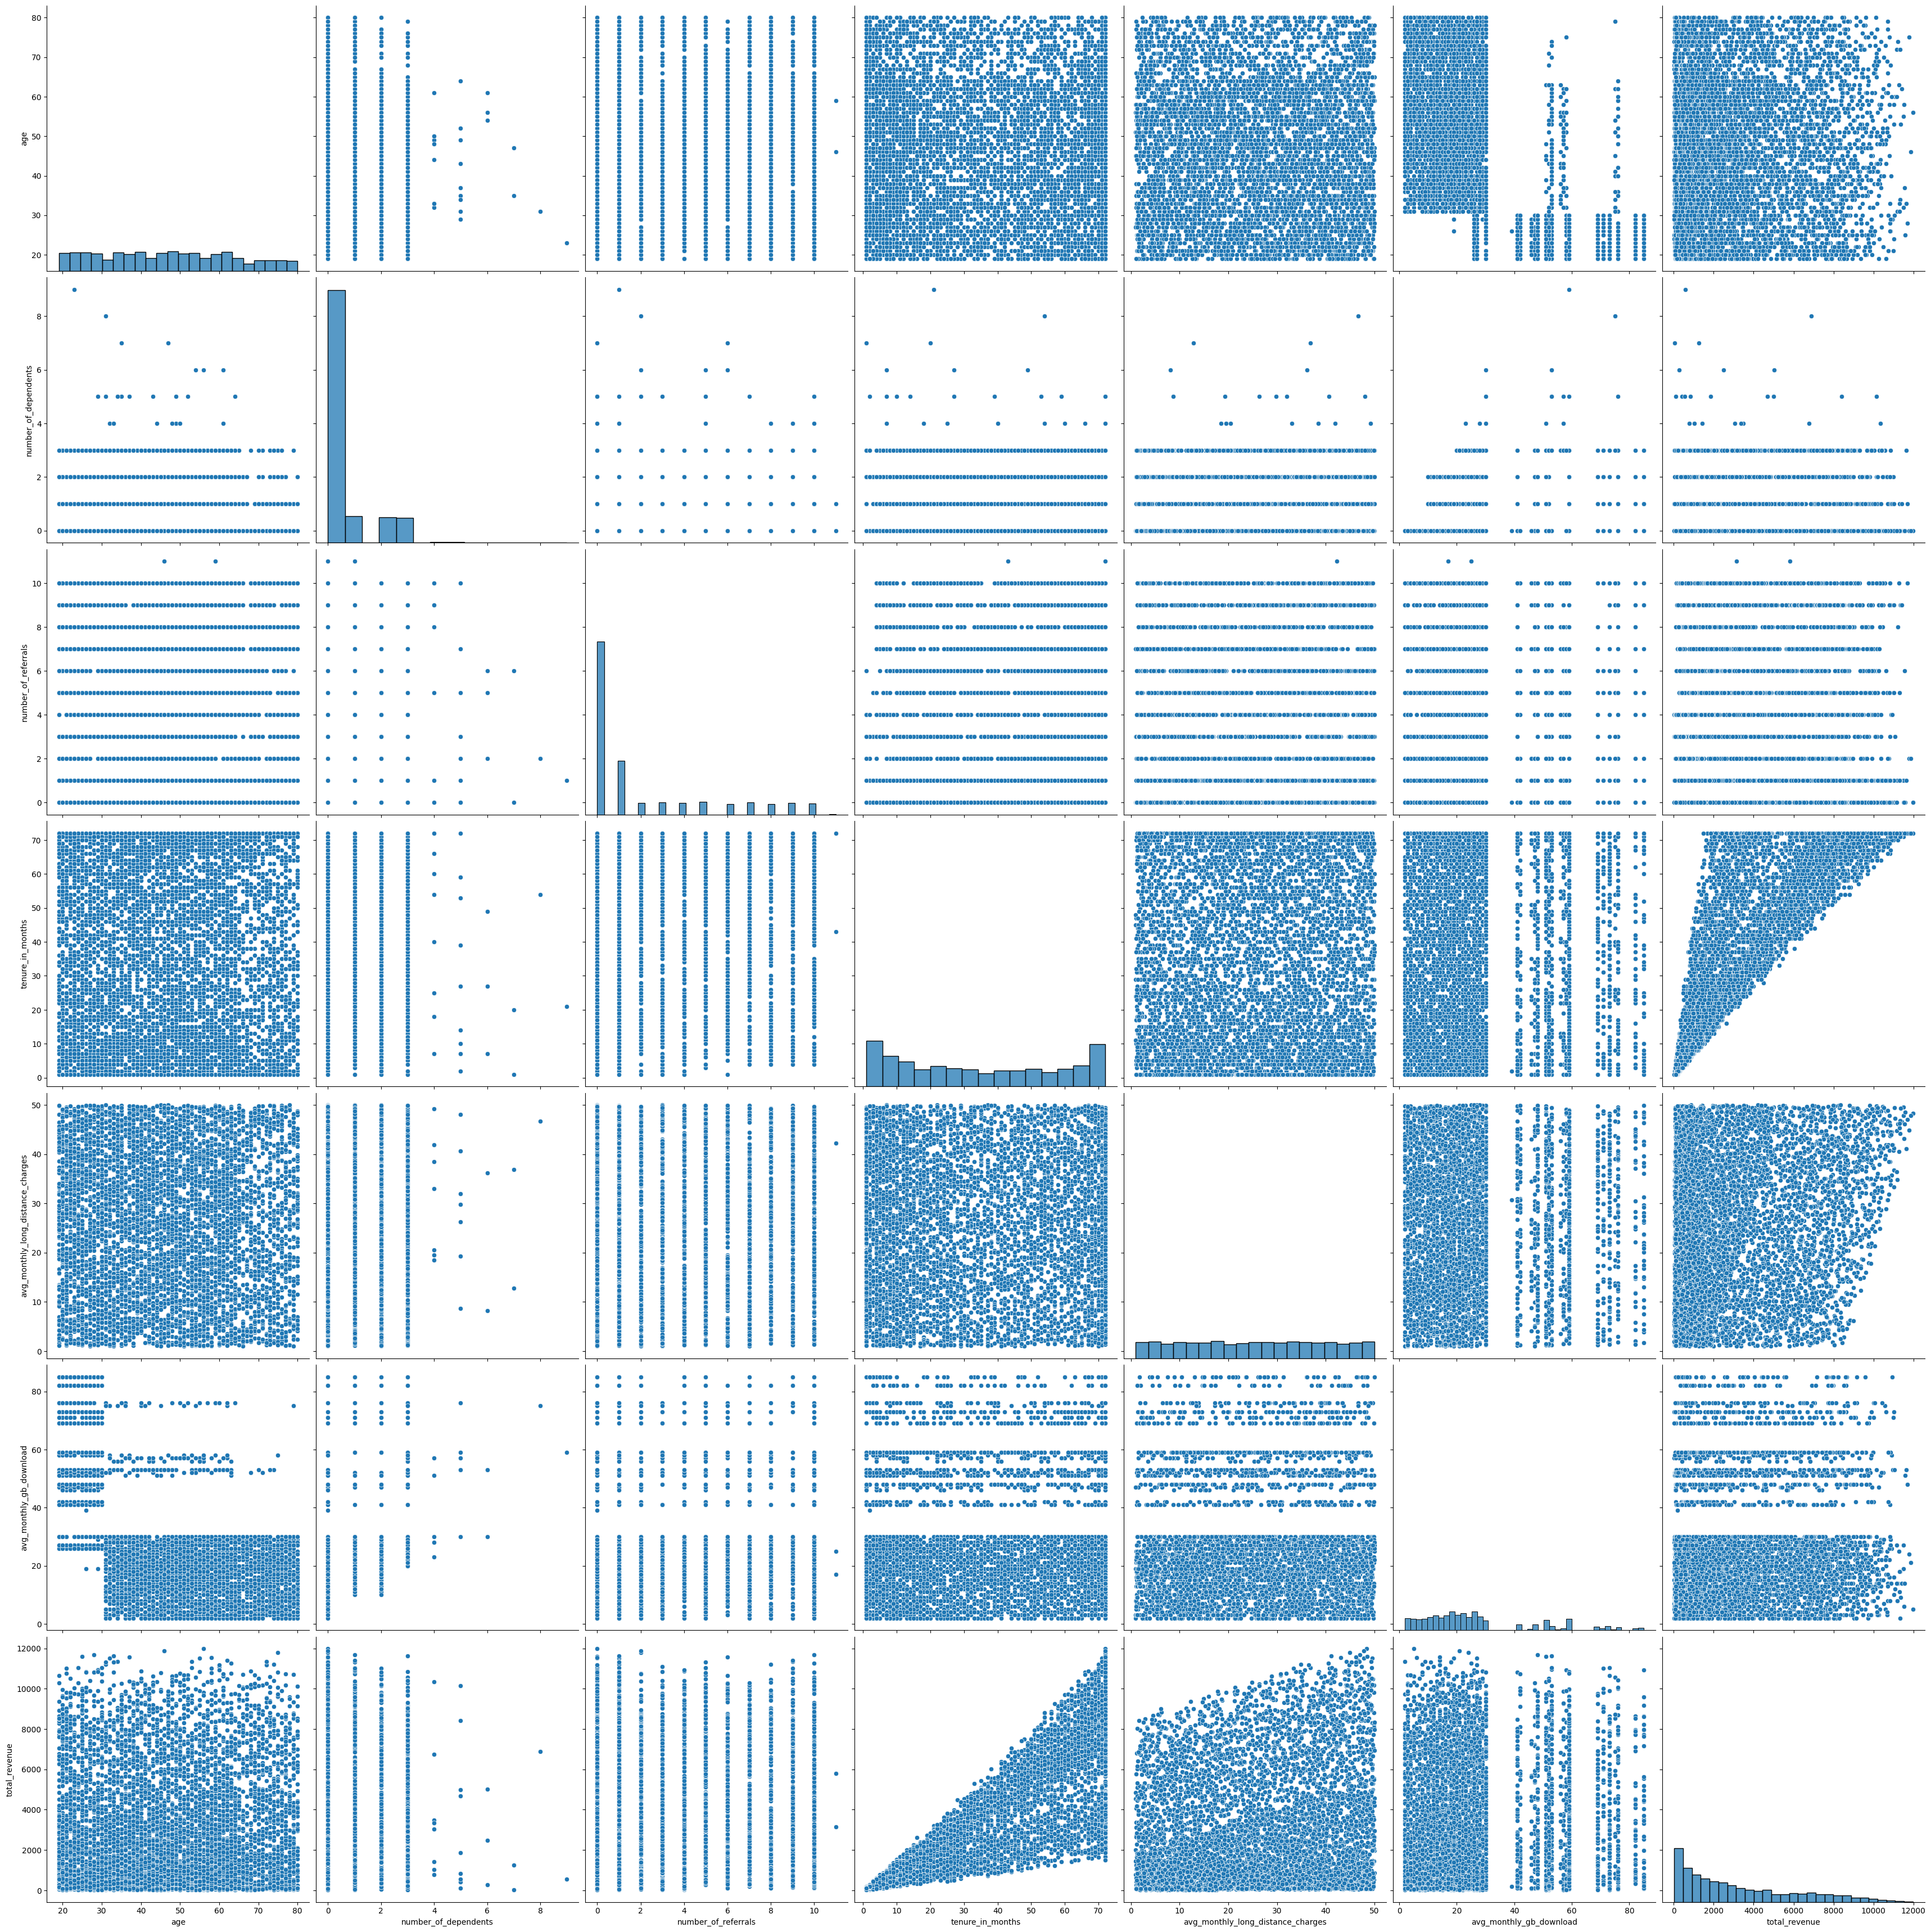

In [38]:
sns.pairplot(df[num_cols], height=5, aspect=1)

### Outcomes
- No specific trends in the graph except for tenure_in_months Vs. total_revenue which are almost in a linear relation and this make sense as customers who have been active for long time should be making higher revenue than newer customers

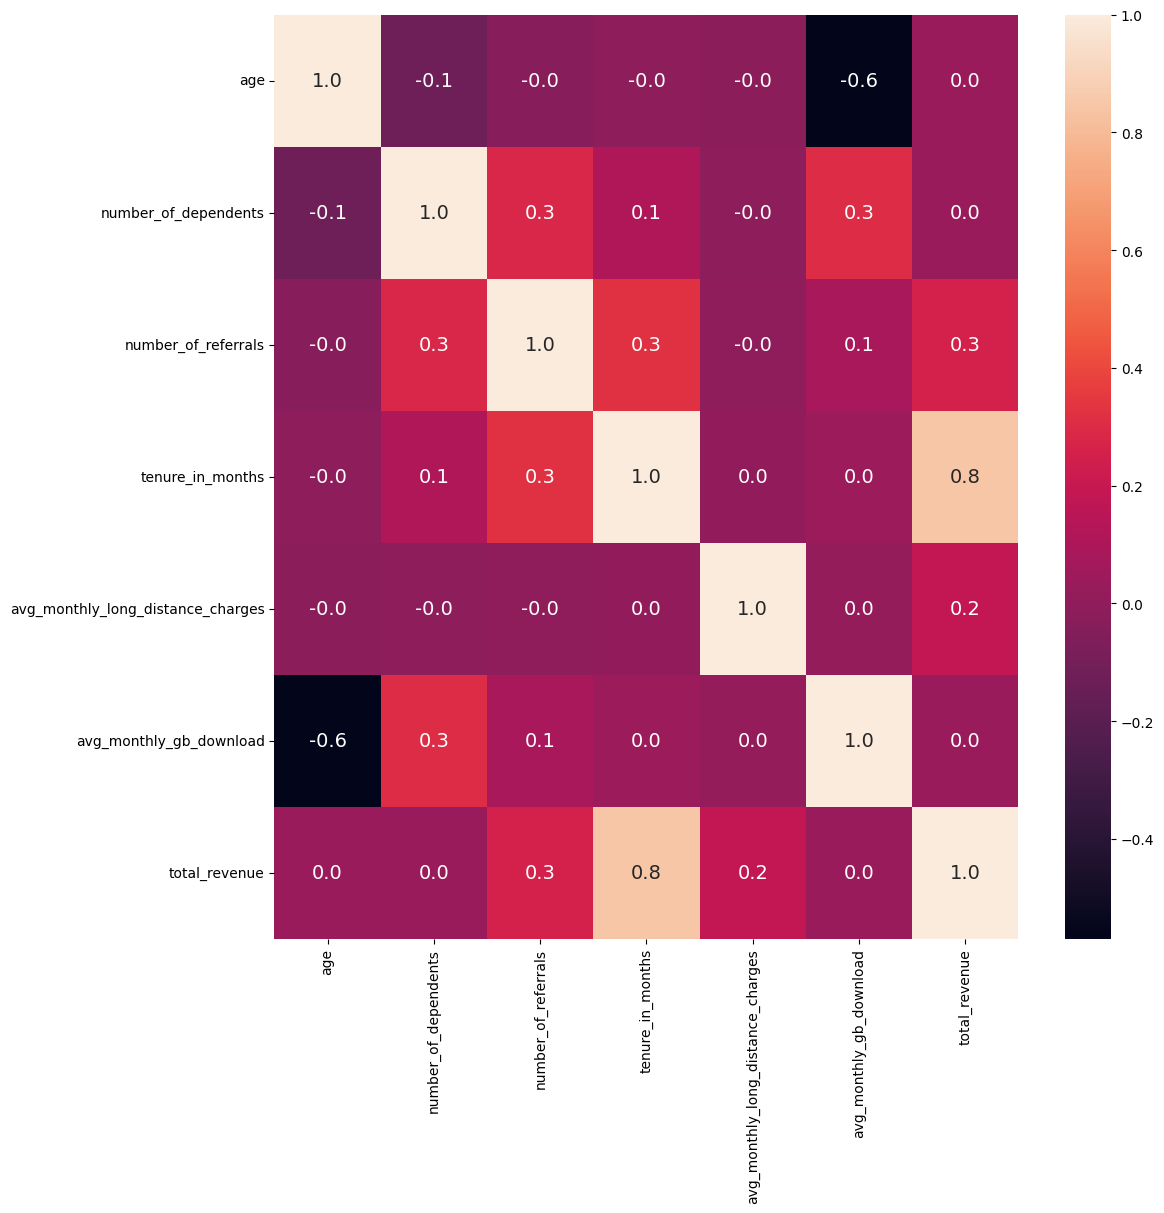

In [39]:
## correlation matrix
plt.figure(figsize=(12, 12))
sns.heatmap(df[num_cols].corr(), annot=True, fmt='0.1f', annot_kws={'fontsize':14})
plt.show()

- As mentioned above tenure_in_months and total_revenue are highly correlated

#### 

### Done for exploration
#### Overall Insights
- `age vs customer_status`: churn is a little high in case of older customers while it decreases in case of younger customers.
- `number_of_dependents`: churn has high probability with customers that has no dependents and decreases with the existance of dependents
- `number_of_referrals`: customers who don't make any referrals are more likely to churn
- `tenure_in_month`: customers are more likely to churn in their early subscription i.e for the first 10 months cutomers are more likely to churn
- `avg_monthly_long_distance_charges`: there is no pattern in this field with churn
- `avg_monthly_gb_download`: customers with low values are more likely to churn
- `total_revenue`: the more revenue the customer give to the company the less likely they churn
- `gender`: there is not much difference between genders on churn rate
- `married`: married customers are less likely to churn
- `offer`: Offer E seems to have bad effect on customer's satisfaction as it has high churn rate
- `internet_service`: customers who subscribe to internet service have more churn rate
- `internet_type`: fiber optic has the highest churn rate among different types
- `other features related to internet_services`: customers who are subscribed to internet services like streamingTV, movie, music tech support, etc. are less likely to churn
- `unlimited_data`: customers with unlimited data subscription have high churn rate
- `contract`: month_to_month contracts have very high churn rate while one and two years contracts have much less churn rate
- `paperless_billing`: churn rate is high for paperless billing
- `payment_method`: bank withdrawal has the highest churn rate among other methods
- `customer_status`: It is clear that we have an imbalanced class, I will handle this later 
- `No specific trends` between numeric features `except for tenure_in_months Vs. total_revenue` which are almost in a linear relation and this make sense as customers who have been active for long time should be making higher revenue than newer customers
- As mentioned above `tenure_in_months` and `total_revenue` are `highly correlated`

#### TODO
- Solve null values
- Deal with outliers
- Create a whole pipeline for transforming the data
- Explore some proper classification models and choose the outperforming one
- Hyperparameter tuning and saving best model
- Model deployment

### Saving dataset as pickle file 

In [40]:
df.to_pickle(EXPORT_PATH)